### Random Forest Modeling for Bunning 2019 Human aging dataset


#### Step 1: Data preprocessing. 
We will combind the categorical data in sheet 2 into the numercial data and use them together for regression modeling

In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

First, import the transformed data and contrapose it.

In [2]:
df = pd.read_excel("../transformed_data.xlsx", sheet_name=0, index_col=0)
df = df.T
# print(df)

In [3]:
table2df = pd.read_excel("../acel13073-sup-0002-tables1-s3.xlsx", sheet_name=1, header=[0,1])
# table2df.head()

In [4]:
df['Sex'] = table2df['Demographics']['Sex'].values
# One-hot encode the Sex and scale BMI so that id doesn't become a dominant feature
# df = pd.get_dummies(df, columns=['Sex'])
df['Sex'] = df['Sex'].map(lambda x: 1 if x == 'Male' else 0)

df['BMI'] = table2df['Demographics']['BMI'].values
# df['BMI'] = StandardScaler().fit_transform(df[['BMI']])


# Age always needs to be at the end since it's the label
df['Age'] = table2df['Demographics']['Age'].values
df.head()

Metabolite name,L-Alanine,L-Aspartic acid,L-Asparagine,Glucosamine|Galactosamine,Hydroxyhippurate,L-Carnitine,Ectoine,Corticosterone,Creatinine,Creatine,...,C8H12N2O5,C9H16N2O4,C9H16O4,C9H18O9,C9H9NO4,C5H8O6,C12H16O6,Sex,BMI,Age
P1,-1.846172,0.484126,0.021412,0.861255,-0.173662,1.018054,-0.047993,-0.678022,0.590303,-1.261375,...,0.642057,0.587633,0.379383,-0.084655,0.751380,-0.229849,-0.119829,1,21.64,27
P2,-0.443329,-0.877494,-0.061673,0.264052,-0.454759,-3.766291,1.083980,-0.221590,-0.329841,-0.501870,...,0.203458,2.074760,-1.527215,-0.088695,0.641425,0.682707,-1.204619,0,22.75,33
P3,-0.134794,0.206897,0.104678,0.283471,-0.607615,0.736472,-0.409403,0.810842,0.119172,0.405288,...,0.233128,-0.047189,1.119094,0.221023,0.700568,0.810287,-0.582386,0,22.97,34
P4,1.068429,-0.146876,-0.031757,0.368148,0.922386,1.818349,0.683843,1.115335,0.941316,1.794518,...,0.437994,0.567404,0.873934,0.164568,1.194226,-0.240203,1.818600,0,28.73,35
P5,0.459775,0.530521,0.103970,0.355795,-0.386900,1.087127,1.320936,0.888927,0.675092,0.413189,...,0.162881,0.474926,-0.670962,0.207942,0.522442,0.003037,0.176705,0,31.01,35


In [5]:
from sklearn.linear_model import LinearRegression

X = df[["Sex", "BMI"]]

for i in range(0, 770):
    y = df.iloc[:,i]
    model = LinearRegression().fit(X, y)
    df.iloc[:, i] = y - model.predict(X)

print(df.iloc[:, 770])

df = pd.concat([df.iloc[:, :770], df.iloc[:, -1]], axis=1)
df.head()

P1      1
P2      0
P3      0
P4      0
P5      0
       ..
P264    0
P265    0
P266    0
P267    0
P268    0
Name: Sex, Length: 268, dtype: int64


,L-Alanine,L-Aspartic acid,L-Asparagine,Glucosamine|Galactosamine,Hydroxyhippurate,L-Carnitine,Ectoine,Corticosterone,Creatinine,Creatine,...,C9H14N2O7(1),C9H14N2O7(2),C8H12N2O5,C9H16N2O4,C9H16O4,C9H18O9,C9H9NO4,C5H8O6,C12H16O6,Age
P1,-1.870348,0.325436,-0.093506,1.043223,0.046746,0.744444,-0.197559,-0.733739,0.505004,-1.145949,...,0.395402,0.472456,0.764096,0.588139,0.567625,0.125033,0.927934,-0.086406,-0.148025,27
P2,-0.343053,-0.768804,-0.003755,0.157708,-0.437031,-3.639361,1.206455,-0.070905,-0.012672,-0.624887,...,0.210357,0.235846,0.158896,2.157630,-1.601811,-0.185951,0.582638,0.486404,-1.157331,33
P3,-0.039500,0.314275,0.162833,0.177586,-0.597702,0.864595,-0.289309,0.954639,0.420856,0.285736,...,0.282536,0.279283,0.187346,0.030931,1.042951,0.122851,0.639690,0.620771,-0.536929,34
P4,1.033282,-0.073839,0.032628,0.274287,0.727701,1.977703,0.741607,1.078783,0.837556,1.765690,...,-1.254409,-0.315007,0.360254,0.521175,0.757261,0.042431,1.078620,-0.252024,1.816115,35
P5,0.372996,0.589965,0.170819,0.266694,-0.662572,1.258845,1.354029,0.780987,0.410845,0.420273,...,0.033531,0.130104,0.072491,0.379475,-0.803678,0.076320,0.385173,0.061554,0.155242,35


In [8]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Assuming df is defined and has the appropriate columns.
# drop all ages < 16
df = df[df['Age'] >= 16]

X = df.iloc[:, :770].values
y = df.iloc[:, -1].values

# Splitting into training and validation datasets
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 5, test_size=0.2)

# Initialize the Random Forest Regressor
rf = RandomForestRegressor()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize Grid Search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters from the Grid Search
best_params = grid_search.best_params_

# Initialize and train the random forest with the best parameters
best_rf = RandomForestRegressor(**best_params)
best_rf.fit(X_train, y_train)

# Prediction on validation data
y_pred = best_rf.predict(X_val)

# Calculate metrics
train_mse = mean_squared_error(y_train, best_rf.predict(X_train))
test_mse = mean_squared_error(y_val, y_pred)

# Show metrics
print(f"Train set MSE: {train_mse}")
print(f"Test set MSE: {test_mse}")

Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Train set MSE: 33.93188885931394
Test set MSE: 100.55872120044717


In [9]:
import pickle

with open('best_param_model.pkl', "wb") as file:
    pickle.dump(best_params, file)

print(best_params)

{'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 10}


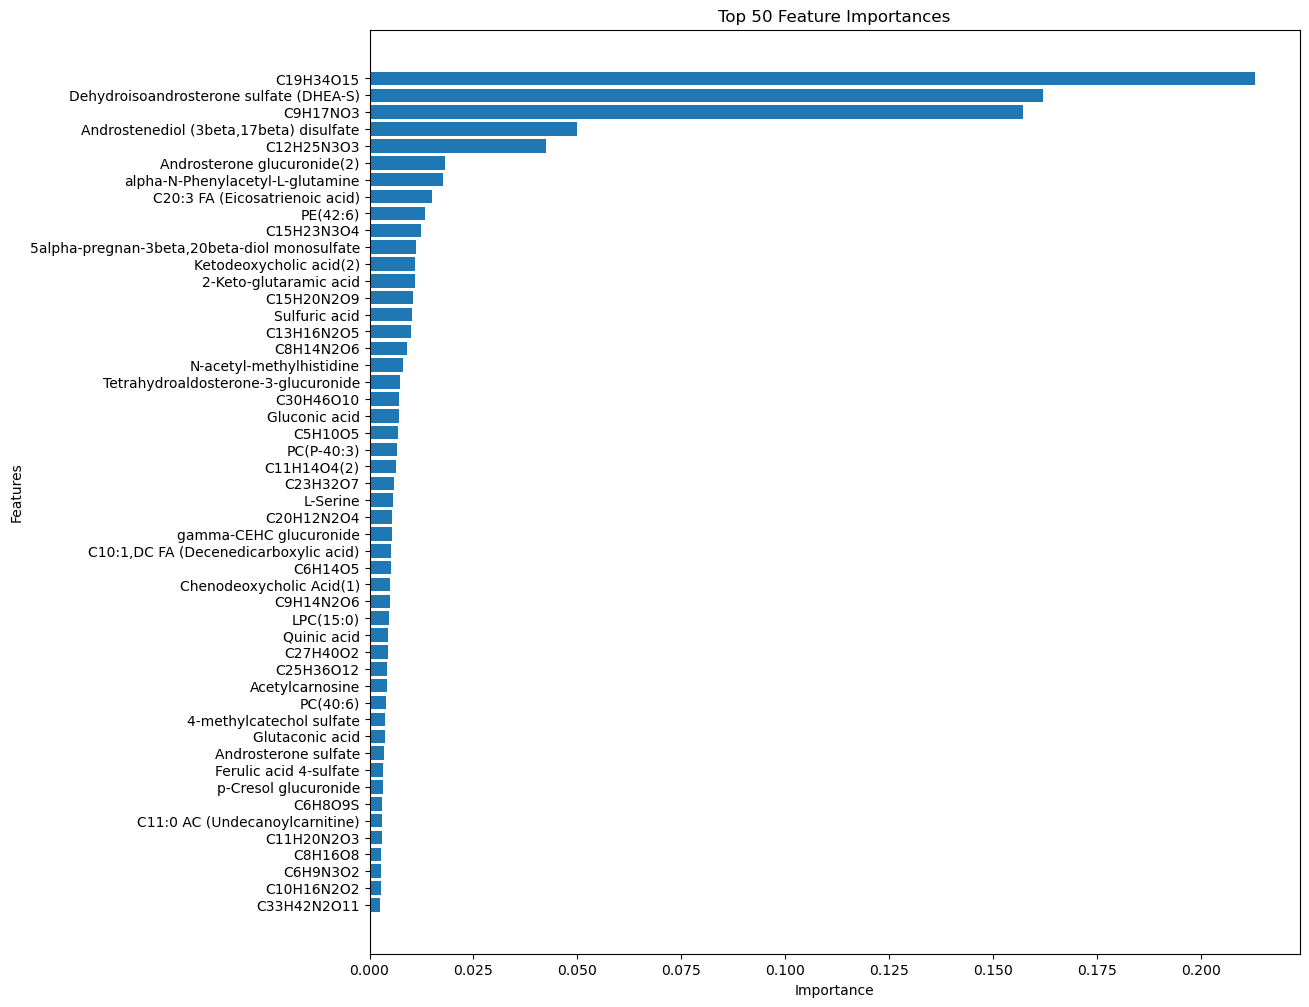

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming best_rf is your trained RandomForestRegressor model
# and assuming df is your original DataFrame

# Get feature importances
importances = best_rf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame(importances, index=df.columns[:770], columns=['Importance']).sort_values('Importance', ascending=False)

# Get top 50 important features
top_50_features = feature_importances.head(50)

# Sort top 50 features in ascending order for better visualization
top_50_features_sorted = top_50_features.sort_values('Importance', ascending=True)

# Plot top 50 features
plt.figure(figsize=(12, 12))
plt.title('Top 50 Feature Importances')
plt.barh(top_50_features_sorted.index, top_50_features_sorted['Importance'])
plt.xlabel('Importance')
plt.ylabel('Features')
plt.show()

# If you want to save these top 50 features to a CSV
# top_50_features.to_csv("top_50_features.csv")
